In [37]:
import pandas as pd

#Visualisation Library
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Classification model 
from sklearn.linear_model import LogisticRegression

#Classification model evaluation metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

#To split the model into training and testing data
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

#Different model improvement packages
from sklearn.model_selection import StratifiedKFold

import joblib

In [38]:
tr = pd.read_csv('../data/expanded_train.csv')

# Retrain Model

In [39]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2364 entries, 0 to 2363
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            2364 non-null   object 
 1   Gender             2364 non-null   object 
 2   Race               2364 non-null   object 
 3   Married            2364 non-null   object 
 4   Dependents         2364 non-null   int64  
 5   Education          2364 non-null   object 
 6   Self_Employed      2364 non-null   object 
 7   ApplicantIncome    2364 non-null   int64  
 8   CoapplicantIncome  2364 non-null   float64
 9   LoanAmount         2364 non-null   float64
 10  Loan_Amount_Term   2364 non-null   float64
 11  Credit_History     2364 non-null   float64
 12  Property_Area      2364 non-null   object 
 13  Loan_Status        2364 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 258.7+ KB


In [40]:
#Converting dependents into int as it includes integer values
tr['Dependents']=tr['Dependents'].astype('int')
tr['ApplicantIncome'] = tr['ApplicantIncome'].astype('int')
#Mapping the object columns to convert it into binary from and then change the data type to int
tr['Married']=tr['Married'].map({'Yes':1, 'No':0})
tr['Education']=tr['Education'].map({'Graduate':1, 'Not Graduate':0})
tr['Self_Employed']=tr['Self_Employed'].map({'Yes':1, 'No':0})
tr['Loan_Status']=tr['Loan_Status'].map({'Y':1, 'N':0})

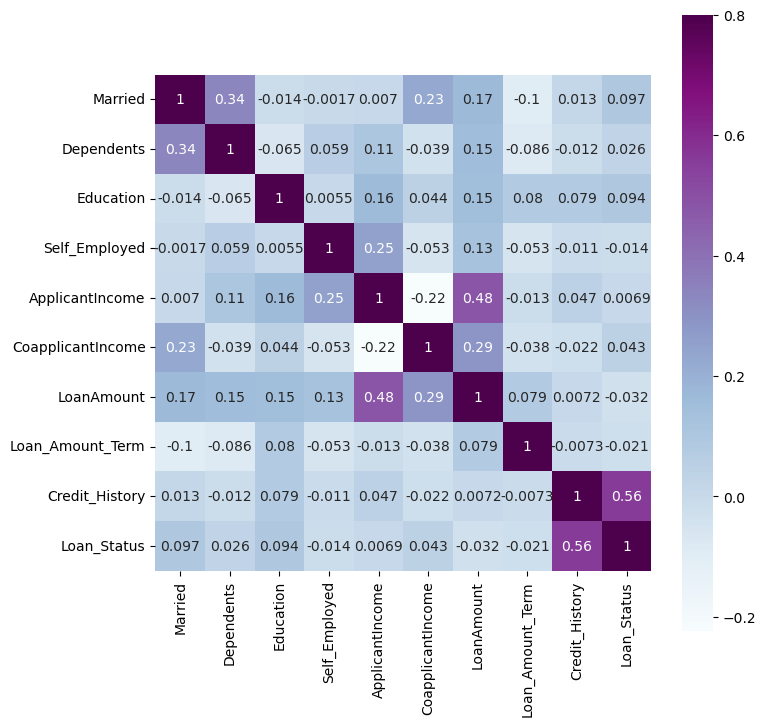

In [41]:
# Specify numeric columns
numeric_columns = tr.select_dtypes(include=[np.number])

# Calculate correlation matrix
matrix = numeric_columns.corr()

# Plot heatmap
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(matrix, vmax=0.8, square=True, cmap="BuPu", annot=True)
plt.show()


In [42]:
tr.columns

Index(['Loan_ID', 'Gender', 'Race', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [43]:
len(tr)

2364

In [44]:

tr.drop('Loan_ID',axis=1, inplace=True)
#Using get dummies for the remaining object columns for which mapping or encoder cant be used 
tr=pd.get_dummies(tr)
tr.head()


Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0        0           0          1              0             5849   
1        1           1          1              0             4583   
2        1           0          1              1             3000   
3        1           0          0              0             2583   
4        0           0          1              0             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0      146.41             360.0             1.0   
1             1508.0      128.00             360.0             1.0   
2                0.0       66.00             360.0             1.0   
3             2358.0      120.00             360.0             1.0   
4                0.0      141.00             360.0             1.0   

   Loan_Status  Gender_Female  Gender_Male  Race_Black  Race_White  \
0            1          False         True        True       False   
1            0          False         True        True       False   
2            1          False         True        True       False   
3            1          False         True        True       False   
4            1          False         True        True       False   

   Property_Area_Rural  Property_Area_Semiurban  Property_Area_Urban  
0                False                    False                 True  
1                 True                    False                False  
2                False                    False                 True  
3                False                    False                 True  
4                False                    False                 True

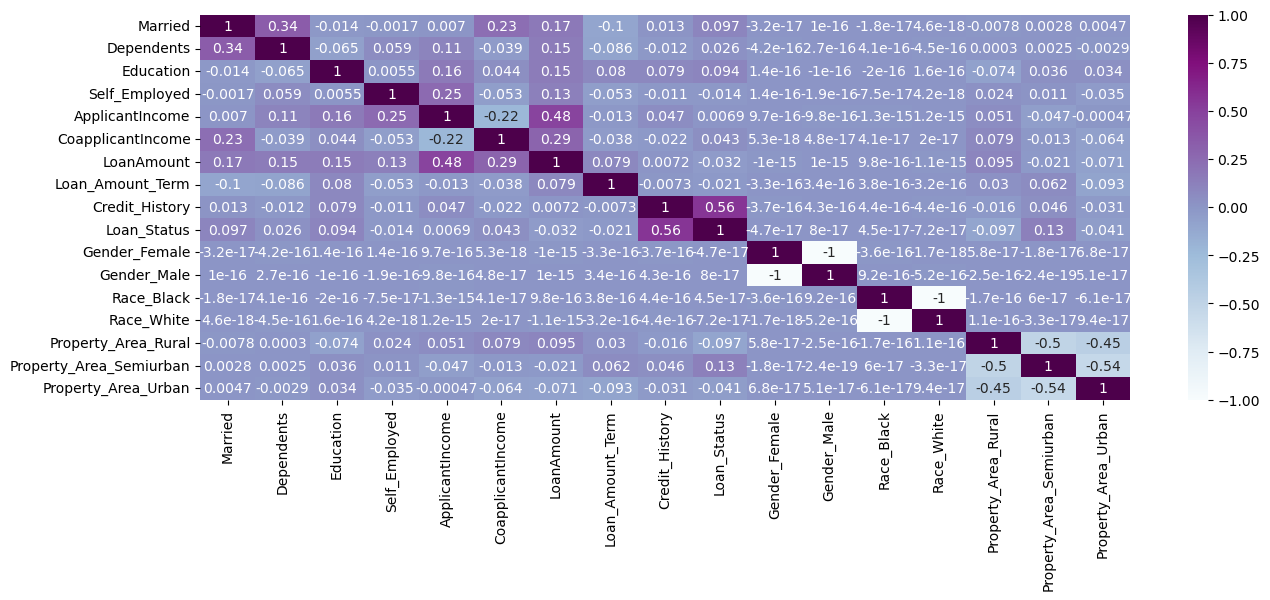

In [45]:
#Checking for correlation again now that we have treated the object columns
plt.figure(figsize=(15,5))
sns.heatmap(tr.corr(),cmap='BuPu',annot=True)
plt.show()

In [46]:
#Spliting the dataset into features and target
x=tr.drop('Loan_Status',axis=1)
y=tr['Loan_Status']
#Further splitting the dataset into training and testing data
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.25,stratify=y)

# Stratified K-Folds

In [47]:
kf=StratifiedKFold(n_splits=5, random_state=1, shuffle= True)
i=1
for train_index,test_index in kf.split(x,y):
    global model
    print('{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl=x.iloc[train_index],x.iloc[test_index]
    ytr,yvl=y.iloc[train_index],y.iloc[test_index]    
    model=LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print('Accuracy score: ', score)
    i+=1
    pred_test =model.predict(xtest)
    pred= model.predict_proba(xvl)[:,1]
    
   

1 of kfold 5
Accuracy score:  0.8245243128964059
2 of kfold 5
Accuracy score:  0.8118393234672304
3 of kfold 5
Accuracy score:  0.7928118393234672
4 of kfold 5
Accuracy score:  0.8118393234672304
5 of kfold 5
Accuracy score:  0.826271186440678


/Users/cooperz/opt/anaconda3/envs/WebMining/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/cooperz/opt/anaconda3/envs/WebMining/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

# Submission

In [48]:
test = pd.read_csv('../data/test.csv')
test_og=test.copy()

In [49]:
test_og['Gender'].fillna(test_og['Gender'].mode()[0],inplace=True)

In [50]:
test_og.isnull().sum()

Loan_ID               0
Gender                0
Race                  0
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History        0
Property_Area         0
dtype: int64

In [51]:
len(test), len(test_og)

(367, 367)

In [52]:
submission=pd.DataFrame()
submission['Loan_ID']=test_og['Loan_ID']
submission['Gender'] = test_og['Gender']
submission['Race'] = test_og['Race']

# Feature Engineering

/var/folders/zs/c32hzq1j6t54vw2q044ggrsr0000gn/T/ipykernel_81842/4202200596.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tr['TotalIncome'])
/var/folders/zs/c32hzq1j6t54vw2q044ggrsr0000gn/T/ipykernel_81842/4202200596.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tr['EMI'])


/var/folders/zs/c32hzq1j6t54vw2q044ggrsr0000gn/T/ipykernel_81842/4202200596.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tr['BalanceIncome'])


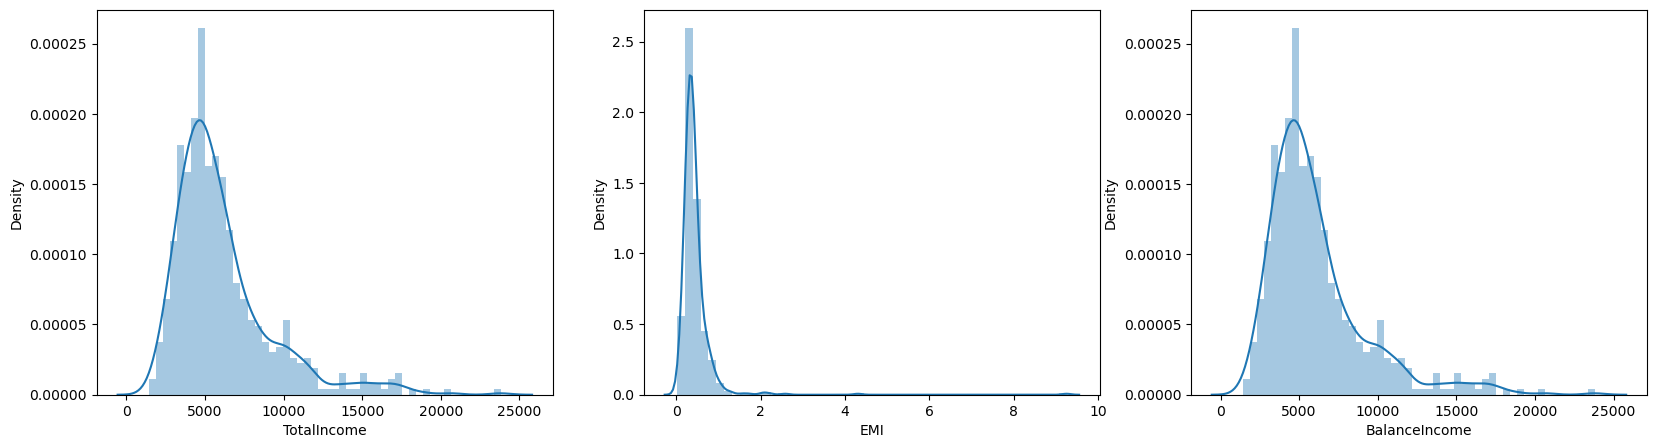

In [53]:
tr['TotalIncome']=tr['ApplicantIncome']+tr['CoapplicantIncome']
tr['EMI']=tr['LoanAmount']/tr['Loan_Amount_Term']
tr['BalanceIncome']=tr['TotalIncome']-tr['EMI']

plt.figure(1,figsize=(20,5))
plt.subplot(1,3,1)
sns.distplot(tr['TotalIncome'])
plt.subplot(1,3,2)
sns.distplot(tr['EMI'])
plt.subplot(1,3,3)
sns.distplot(tr['BalanceIncome'])
plt.show()

In [54]:
tr.drop(['ApplicantIncome','CoapplicantIncome','Loan_Amount_Term','LoanAmount'],axis=1,inplace=True)

In [55]:
test = pd.read_csv('../data/predict_format_test.csv')

# Testing multiple models

In [56]:
x=tr.drop('Loan_Status', axis=1)
y=tr['Loan_Status']

In [57]:
def model(model_name,feature,target):
    i=1
    kf=StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
    for train_index,test_index in kf.split(x,y):
        print('{} of kfold {}'.format(i,kf.n_splits))
        xtr,xte= x.iloc[train_index],x.iloc[test_index]
        ytr,yte=y.iloc[train_index],y.iloc[test_index]
        
        model=model_name
        model.fit(xtr,ytr)
        pred=model.predict(xte)
        score=accuracy_score(yte,pred)
        print('Accuracy_score: ',score)
        i+=1
        pred=model.predict_proba(xte)[:,1]
    

### Logistic regression

In [58]:
lr = LogisticRegression()
model(lr,x,y)
pred_test=lr.predict(test)
joblib.dump(lr, '../logistic_regression_model_new.joblib')

1 of kfold 5
Accuracy_score:  0.8181818181818182
2 of kfold 5
Accuracy_score:  0.8118393234672304
3 of kfold 5
Accuracy_score:  0.7124735729386892
4 of kfold 5
Accuracy_score:  0.8097251585623678
5 of kfold 5
Accuracy_score:  0.8305084745762712


/Users/cooperz/opt/anaconda3/envs/WebMining/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


['../logistic_regression_model_new.joblib']

In [59]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_og['Loan_ID']

# submission['Loan_Status']=submission['Loan_Status'].map({1: 'Yes',0:'No'})
pd.DataFrame(submission).to_csv('../LogisticRegression_new.csv')

### Decision Tree

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
dt=DecisionTreeClassifier(max_depth=10)

In [61]:
model(dt,x,y)

1 of kfold 5
Accuracy_score:  0.9386892177589852
2 of kfold 5
Accuracy_score:  0.9069767441860465
3 of kfold 5
Accuracy_score:  0.9027484143763214
4 of kfold 5
Accuracy_score:  0.8942917547568711
5 of kfold 5
Accuracy_score:  0.923728813559322


In [62]:
pred_test=dt.predict(test)
joblib.dump(dt, '../decision_tree_model_new.joblib')

['../decision_tree_model_new.joblib']

In [63]:
submission['Loan_Status']=pred_test

# submission['Loan_Status']=submission['Loan_Status'].map({1: 'Yes',0:'No'})
pd.DataFrame(submission).to_csv('../DecisionTreeClassifier_new.csv')

### Random forest

In [64]:
rfc=RandomForestClassifier(max_depth=5,n_estimators=21 ,random_state=1)
model(rfc,x,y)

1 of kfold 5


Accuracy_score:  0.8308668076109936
2 of kfold 5
Accuracy_score:  0.828752642706131
3 of kfold 5
Accuracy_score:  0.8202959830866807
4 of kfold 5
Accuracy_score:  0.8372093023255814
5 of kfold 5
Accuracy_score:  0.8432203389830508


In [65]:
pred_test=rfc.predict(test)
joblib.dump(rfc, '../random_forest_model_new.joblib')


['../random_forest_model_new.joblib']

In [66]:
submission['Loan_Status']=pred_test

# submission['Loan_Status']=submission['Loan_Status'].map({1: 'Yes',0:'No'})
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status','Gender', 'Race']).to_csv('../RandomForestClassifier_new.csv')

# Feature Importance

<Axes: >

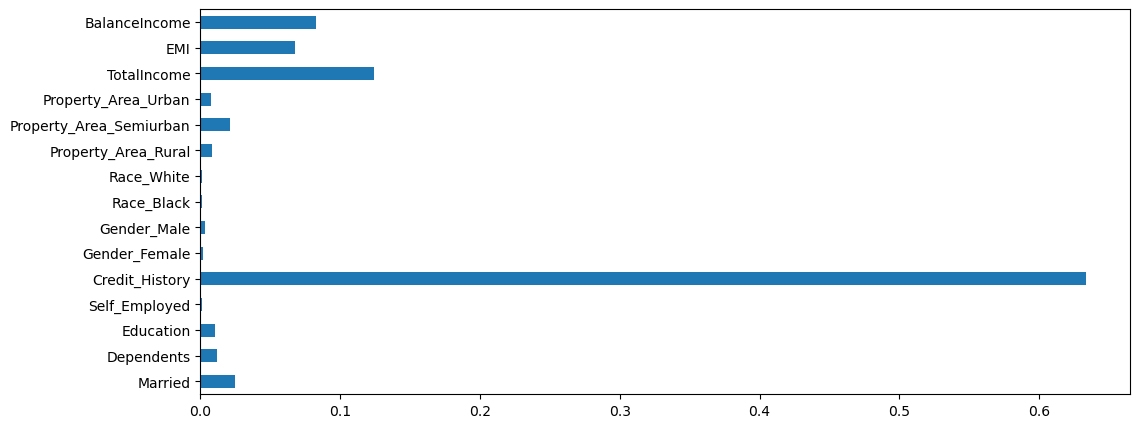

In [67]:
importances=pd.Series(rfc.feature_importances_, index=x.columns)
importances.plot(kind='barh',figsize=(12,5))

# XGB CLassifier

In [68]:
xgb=XGBClassifier()
model(xgb,x,y)
pred_test=xgb.predict(test)
joblib.dump(xgb, '../xgb_model_new.joblib')

1 of kfold 5
Accuracy_score:  1.0
2 of kfold 5
Accuracy_score:  0.9936575052854123
3 of kfold 5
Accuracy_score:  0.9936575052854123
4 of kfold 5
Accuracy_score:  1.0
5 of kfold 5
Accuracy_score:  1.0


['../xgb_model_new.joblib']

In [69]:
submission['Loan_Status']=pred_test

# submission['Loan_Status']=submission['Loan_Status'].map({1: 'Yes',0:'No'})
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status','Gender', 'Race']).to_csv('../XGBClassifier_new.csv')

# GridSearchCV

In [70]:
parameters={'max_depth':list(range(1,20,2)),'n_estimators': list(range(1,200,20))}
grid=GridSearchCV(RandomForestClassifier(random_state=1), parameters)

xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=1,test_size=0.25)
grid.fit(xtrain,ytrain)

GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]})

In [71]:
grid.best_params_
grid.best_score_
print(grid.best_estimator_)
model=grid.best_estimator_
model.fit(x,y)

pred_test=model.predict(test)

RandomForestClassifier(max_depth=19, n_estimators=161, random_state=1)


In [73]:
submission['Loan_Status']=pred_test

# submission['Loan_Status']=submission['Loan_Status'].map({1: 'Yes',0:'No'})
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status', 'Gender', 'Race']).to_csv('../predictions/GridSearchCV_new.csv')
joblib.dump(model, '../grid_model_new.joblib')

['../grid_model_new.joblib']